In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [9]:
#Gerando circulos
X, Y = make_circles (n_samples=300, noise=0.1, factor=0.7, random_state=0)


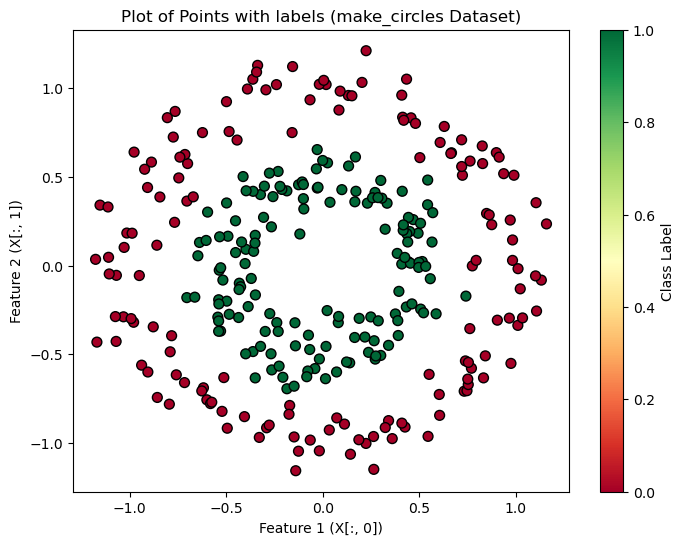

In [34]:
#Plotando os pontos
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlGn, edgecolors='k', marker='o', s=50)
plt.xlabel('Feature 1 (X[:, 0])')
plt.ylabel('Feature 2 (X[:, 1])')
plt.title('Plot of Points with labels (make_circles Dataset)')
plt.colorbar(label='Class Label')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from sklearn.datasets import make_circles
from ipywidgets import interactive

# Gerar dados sintéticos
X, y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

def update_plot(hidden_layer_size):
    """Atualiza e exibe o gráfico conforme o tamanho da camada oculta."""
    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size,), activation='relu', max_iter=3000, random_state=1)
    clf.fit(X, y)

    # Criar uma grade de pontos para visualização
    x_vals = np.linspace(X[:, 0].min() - 0.1, X[:, 0].max() + 0.1, 100)
    y_vals = np.linspace(X[:, 1].min() - 0.1, X[:, 1].max() + 0.1, 100)
    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    # Predições para os pontos da grade
    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))
    Z = clf.predict(grid_points).reshape(X_plane.shape)

    # Predições para os dados originais
    y_pred = clf.predict(X)

    # Limpar apenas o conteúdo do eixo, sem apagar a figura inteira
    plt.gca().cla()

    # Plotar a fronteira de decisão
    plt.contourf(X_plane, Y_plane, Z, levels=np.linspace(Z.min(), Z.max(), 3), cmap=plt.cm.RdYlGn, alpha=0.6)

    # Separar pontos por classe predita
    class_0 = y_pred == 0
    class_1 = y_pred == 1

    plt.scatter(X[class_0, 0], X[class_0, 1], c='red', edgecolors='black', marker='o', s=50, label='Classe 0')
    plt.scatter(X[class_1, 0], X[class_1, 1], c='green', edgecolors='black', marker='o', s=50, label='Classe 1')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Decision Boundary (Hidden Layer Size={hidden_layer_size})')
    plt.legend()
    plt.draw()  # Atualiza a figura sem bloquear a execução

# Criar slider interativo
hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size')

# Criar widget interativo
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)

# Exibir o widget
display(interactive_plot)